# Image Classification - Xray

Train a new model to classify Xray images with Deep Learning.

Classes:
elbow, finger, forearm, humerus

**link for the dataset (will be provided)**


---

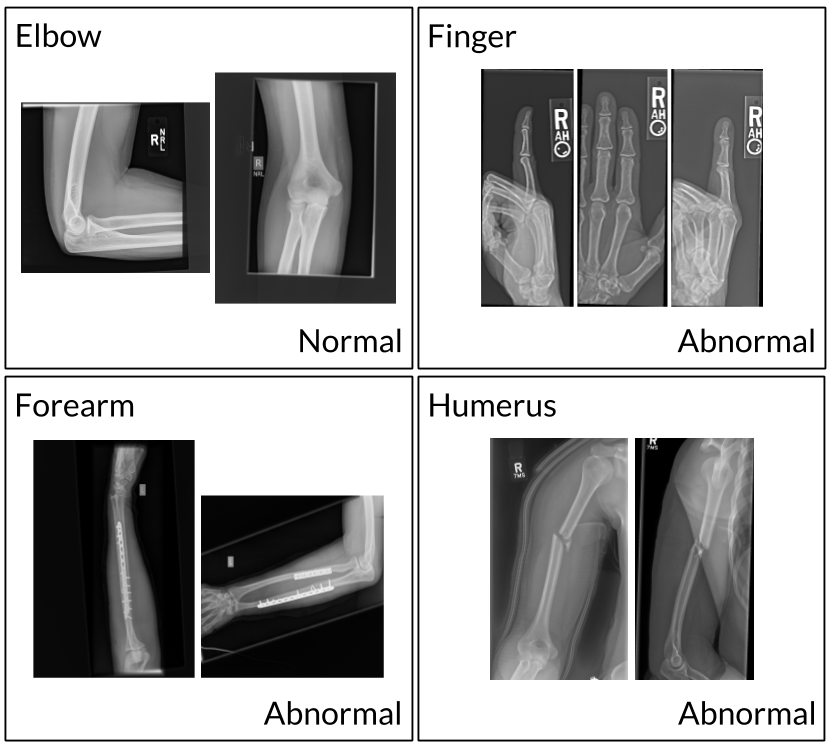


MURA (musculoskeletal radiographs) is a large dataset of bone X-rays. Algorithms are tasked with determining whether an X-ray study is normal or abnormal.

**Source :** https://stanfordmlgroup.github.io/competitions/mura/ 

### COLAB - Mount drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Prepare dataset

In [1]:
#%cd '/content/drive/My Drive/deep-learning-with-keras-101/datasets/'
#!unzip parts_train.zip
#!unzip parts_test.zip

In [2]:
import os

train_dir='/content/drive/My Drive/deep-learning-with-keras-101/datasets/parts_train'
test_dir='/content/drive/My Drive/deep-learning-with-keras-101/datasets/parts_test'

In [ ]:
os.listdir(train_dir)

In [4]:
import glob
elbow_images = glob.glob(train_dir+'/elbow/*')
finger_images = glob.glob(train_dir+'/finger/*')
forearm_images = glob.glob(train_dir+'/forearm/*')
humerus_images = glob.glob(train_dir+'/humerus/*')


In [6]:
len(elbow_images)

1000

## Gorsellestirme

In [ ]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(15, 7))
ax = ax.ravel()

for i in range(0,3):
  ax[i].imshow(plt.imread(finger_images[i]), cmap='gray')
  ax[i].set_title("finger")

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 7))
ax = ax.ravel()

for i in range(0,3):
  ax[i].imshow(plt.imread(elbow_images[i]), cmap='gray')
  ax[i].set_title("elbow")
  

In [ ]:

fig, ax = plt.subplots(1, 3, figsize=(15, 7))
ax = ax.ravel()

for i in range(0,3):
  ax[i].imshow(plt.imread(forearm_images[i]), cmap='gray')
  ax[i].set_title("forearm")


In [ ]:

fig, ax = plt.subplots(1, 3, figsize=(15, 7))
ax = ax.ravel()

for i in range(0,3):
  ax[i].imshow(plt.imread(humerus_images[i]), cmap='gray')
  ax[i].set_title("humerus")

## Prepare dataset

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# load dataset
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2, )

train_gen = datagen.flow_from_directory(train_dir,
                                        target_size=(128, 128),
                                        batch_size=64,
                                        class_mode='categorical',
                                        color_mode='grayscale',
                                        shuffle=True,
                                        subset="training"
                                        )

valid_gen = datagen.flow_from_directory(train_dir,
                                        target_size=(128, 128),
                                        batch_size=64,
                                        class_mode='categorical',
                                        color_mode='grayscale',
                                        shuffle=True,
                                        subset="validation"
                                        )

test_gen = datagen.flow_from_directory(test_dir,
                                       target_size=(128, 128),
                                       batch_size=64,
                                       class_mode='categorical',
                                       color_mode='grayscale'
                                       )

Found 3200 images belonging to 4 classes.
Found 800 images belonging to 4 classes.
Found 800 images belonging to 4 classes.


In [ ]:
# train set
print(train_gen.class_indices)
print(train_gen.samples)

In [ ]:
# validation set
print(valid_gen.class_indices)
print(valid_gen.samples)

In [ ]:
# test set
print(test_gen.class_indices)
print(test_gen.samples)

## Prepare model

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy

In [16]:
first_model = Sequential()
first_model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(128, 128, 1)))
first_model.add(MaxPooling2D(pool_size=(2, 2)))
first_model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
first_model.add(MaxPooling2D(pool_size=(2, 2)))
first_model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
first_model.add(MaxPooling2D(pool_size=(2, 2)))
first_model.add(Flatten())
first_model.add(Dense(256, activation='relu'))
first_model.add(Dense(128, activation='relu'))
first_model.add(Dense(4, activation='softmax'))

In [17]:
first_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0

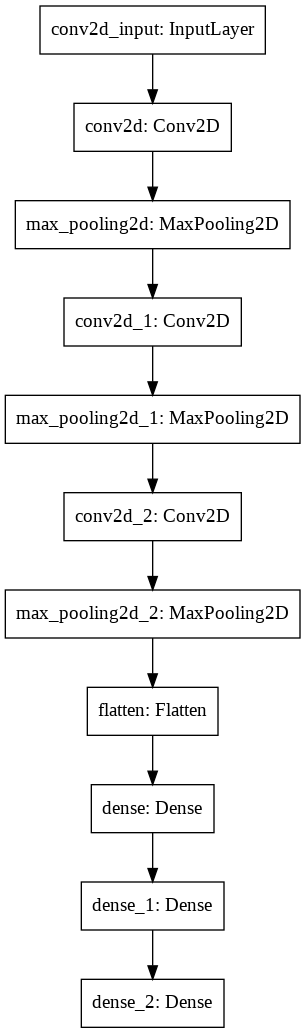

In [18]:
from keras.utils import plot_model
plot_model(first_model)

In [19]:
# compile model
first_model.compile(loss=categorical_crossentropy,
                    optimizer=Adam(lr=0.001),
                    metrics=['accuracy'])

## Training

In [ ]:
history = first_model.fit(train_gen,
                          batch_size=64,
                          epochs=15,
                          verbose=1,
                          validation_data=valid_gen
                          )

Epoch 1/15
50/50 [==============================] - 114s 2s/step - loss: 1.1571 - accuracy: 0.4708 - val_loss: 0.7241 - val_accuracy: 0.7250
Epoch 2/15
50/50 [==============================] - 113s 2s/step - loss: 0.6131 - accuracy: 0.7692 - val_loss: 0.5849 - val_accuracy: 0.7738
Epoch 3/15
50/50 [==============================] - 112s 2s/step - loss: 0.4552 - accuracy: 0.8365 - val_loss: 0.4280 - val_accuracy: 0.8375
Epoch 4/15
50/50 [==============================] - 112s 2s/step - loss: 0.3099 - accuracy: 0.8912 - val_loss: 0.4404 - val_accuracy: 0.8350
Epoch 5/15
50/50 [==============================] - 112s 2s/step - loss: 0.2038 - accuracy: 0.9309 - val_loss: 0.5708 - val_accuracy: 0.8175
Epoch 6/15
50/50 [==============================] - 112s 2s/step - loss: 0.1842 - accuracy: 0.9379 - val_loss: 0.4809 - val_accuracy: 0.8275
Epoch 7/15
50/50 [==============================] - 112s 2s/step - loss: 0.1155 - accuracy: 0.9645 - val_loss: 0.4707 - val_accuracy: 0.8700
Epoch 8/15
50

## Evaluate Model

In [ ]:
loss, accuracy = first_model.evaluate(test_gen)
print("Test: accuracy = %f  ;  loss = %f " % (accuracy, loss))

13/13 [==============================] - 286s 24s/step - loss: 0.6740 - accuracy: 0.8625
Test: accuracy = 0.862500  ;  loss = 0.674045 


## Save model & weights to disk

In [ ]:
first_model.save('my_first_xray_model.h5')

In [ ]:
#or
first_model.save('/content/drive/My Drive/deep-learning-with-keras-101/my_first_xray_model.h5')

## (Optional) Test model with single image

In [20]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

In [21]:
# load model from file
first_model = load_model('/content/drive/My Drive/deep-learning-with-keras-101/my_first_xray_model.h5')

In [22]:
classes = ['elbow', 'finger', 'forearm', 'humerus']

In [23]:
test_image_elbow = '/content/drive/MyDrive/deep-learning-with-keras-101/datasets/parts_test/elbow/164554.png'
test_image_finger = '/content/drive/MyDrive/deep-learning-with-keras-101/datasets/parts_test/finger/756565.png'
test_image_forearm = '/content/drive/MyDrive/deep-learning-with-keras-101/datasets/parts_test/forearm/423453.png'
test_image_humerus = '/content/drive/MyDrive/deep-learning-with-keras-101/datasets/parts_test/humerus/413432.png'

In [39]:
# load image from file
image = load_img(test_image_elbow, target_size=(128, 128), color_mode="grayscale")
image = img_to_array(image) / 255
image = np.expand_dims(image, axis=0)
print('shape:', image.shape)

shape: (1, 128, 128, 1)


In [40]:
preds = first_model.predict(image)

In [41]:
preds

array([[6.0642094e-07, 1.8423035e-04, 1.6032333e-06, 9.9981362e-01]],
      dtype=float32)

In [ ]:
print(preds.argmax())
classes[preds.argmax()]

In [ ]:
plt.imshow(plt.imread(test_image_elbow), cmap=plt.cm.binary)
plt.show()

## (Optional) Model Training History

In [ ]:
# list all keys in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

## TO DO
Task 1. Download a new image from url and test the trained model

Task 2. Update learning rate and re-train the model

Task 3. Add dropout layer and re-train the model

Task 4. Add data augmentation and re-train the model

`train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=10, width_shift_range=0.2, height_shift_range=0.2, zoom_range=0.2, horizontal_flip=True)`